## Lab 10 : Non-local Means Filtering

### Author   :Niyas Mon P
### Roll No. :EE20B094

In [2]:
#  Before running the code blocks, please ensure all the images are uploaded

In [3]:
# importing necessary libraries
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from scipy.io import loadmat
from imageio.v2 import imread
import numpy as np
import cv2

In [4]:
# reading the images
f        = imread('krishna.png')/255       # latent image
noisy_g  = imread('krishna_0_001.png')/255 # noisy image

# NLM Filtering
The equation of NLM filter at a pixel location $\underline p$ is given by

$$
g(\underline p) = \frac{1}{Z_{p}}\Sigma_{q\in G_{p}}G_{\sigma}(\mathcal{\underline N}_{p}-\mathcal{\underline N}_{q})f(\underline q)
$$

where $G_{p}$ is a neighborhood of size $(2W+1)\times (2W+1)$ around $\underline p$.
$\mathcal{\underline N}_{p}$ and $\mathcal{\underline N}_{q}$ are the similarity neighbourhood of radius $W_{sim}$ around $p$ and $q$ respectively. $G_{\sigma}$ is the Gaussian intensity weight for a given $\sigma$ which is given by
$$
G_{\sigma}(\underline x) = e ^{-\frac{\Sigma x_i^2}{\sigma^2}}
$$
, and, $f(\underline q)$ is the image intensity at pixel $q$. $Z_{p}$ is a normalizing constant given by

$$
Z_{p} = \Sigma_{q\in G_{p}}G_{\sigma}(\mathcal{\underline N}_{p}-\mathcal{\underline N}_{q})
$$

#### `zero_pad` function takes input image and pad_size as arguments and outputs the zero padded image

In [5]:
def zero_pad(img,pad_size):
  m,n,_          = img.shape # shape of the image
  # zero padding
  padded_image   = np.zeros((m+2*pad_size,n+2*pad_size,3))
  padded_image[pad_size:-pad_size,pad_size:-pad_size,:] = img

  return padded_image

#### `get_wp` funtion returns the filter **$w_{p}$** for each pixel given the search neighbourhood of that pixel

In [6]:
def get_wp(Np_w,Wsim,sigma):
  # this function computes the filter values w_p at pixel location p
  # given its search neighbourhood
  m_,n_,_   = Np_w.shape
  m,n       = m_-2*Wsim, n_-2*Wsim

  wp        = np.zeros((m,n)) # array to store filter values
  # similarity neighbourhood aroung p
  Np        = Np_w[m_//2 -Wsim:m_//2 +Wsim+1,n_//2 -Wsim:n_//2 +Wsim+1]
  # vectorising
  Vp        = Np.reshape(-1)

  # for each q in the search neighbourhood
  for i in range(m):
    for j in range(n):
      ii      = i + Wsim
      jj      = j + Wsim
      # similarity neighbourhood aroung q
      Nq      = Np_w[ii-Wsim:ii+Wsim+1,jj-Wsim:jj+Wsim+1]
      # vectorising
      Vq      = Nq.reshape(-1)
      # calculate the filter value
      x       = Vp - Vq
      wp[i,j] = np.exp(-(np.dot(x.T,x))/(sigma**2))

  # vectorize and normalize
  wp  =  wp.reshape(-1) / np.sum(wp)
  return wp


`NLM` funtion performs non local means filtering

In [7]:
def NLM(img,W,Wsim,SigmaNLM):

  m,n,_             = img.shape
  # array to store filtered image
  f_hat             = np.zeros_like(img,dtype=float)
  # zero padding
  pad_size          = W+Wsim
  img_pad           = zero_pad(img,W+Wsim)

  # for each pixel
  for i in range(m):
    for j in range(n):
      ii            = i + pad_size
      jj            = j + pad_size
      # getting the search neighbourhood of pixel p
      Np_w          = img_pad[ii-pad_size:ii+pad_size+1,jj-pad_size:jj+pad_size+1]
      # computing the filter w_p at pixel location p
      wp            = get_wp(Np_w,Wsim,SigmaNLM)

      # taking RGB patches around p with radius W and vectoring them
      Vr            = img_pad[ii-W:ii+W+1,jj-W:jj+W+1,0].reshape(-1)
      Vg            = img_pad[ii-W:ii+W+1,jj-W:jj+W+1,1].reshape(-1)
      Vb            = img_pad[ii-W:ii+W+1,jj-W:jj+W+1,2].reshape(-1)

      # calculate the intensity at the output pixel p for each colour channel
      f_hat[i,j,0]  = np.dot(Vr.T,wp)
      f_hat[i,j,1]  = np.dot(Vg.T,wp)
      f_hat[i,j,2]  = np.dot(Vb.T,wp)


  return f_hat


# **Q1**
### (a) $W = 3, W_{sim} = 3, \\
\sigma_{NLM} = \{ 0.1,0.2,0.3,0.4,0.5 \}$

In [8]:
W         = 3
Wsim      = 3
sigmaNLM  = [0.1,0.2,0.3,0.4,0.5]

#list to store filtered images
f_hat_a   = [noisy_g]

# performing NLM filter
for sigma in sigmaNLM:
  f_hat_a.append(NLM(noisy_g,W,Wsim,sigma))

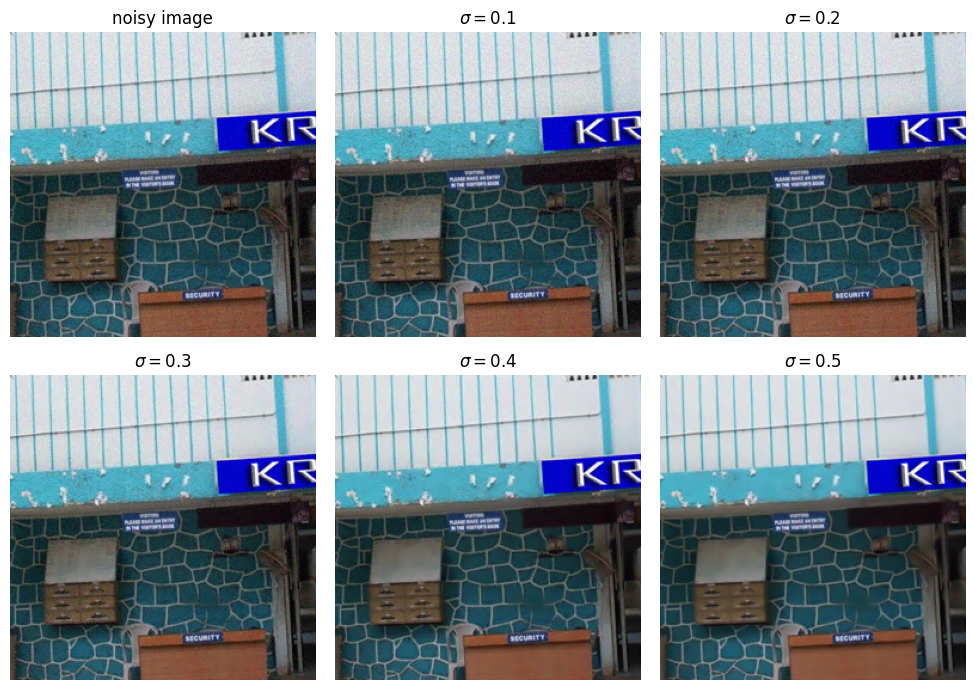

In [9]:
# plotting the filtered images
plt.figure(figsize=(10,7))

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(f_hat_a[i])
  if i == 0:
    plt.title('noisy image')
  else:
    plt.title(f'$\sigma = {sigmaNLM[i-1]}$')
  plt.axis('off')
  plt.tight_layout()

#  
### (b) $W = 5, W_{sim} = 3, \\
\sigma_{NLM} = \{ 0.1,0.2,0.3,0.4,0.5 \}$

In [10]:
W         = 5
Wsim      = 3
sigmaNLM  = [0.1,0.2,0.3,0.4,0.5]

#list to store filtered images
f_hat_b   = [noisy_g]

# performing NLM filter
for sigma in sigmaNLM:
  f_hat_b.append(NLM(noisy_g,W,Wsim,sigma))

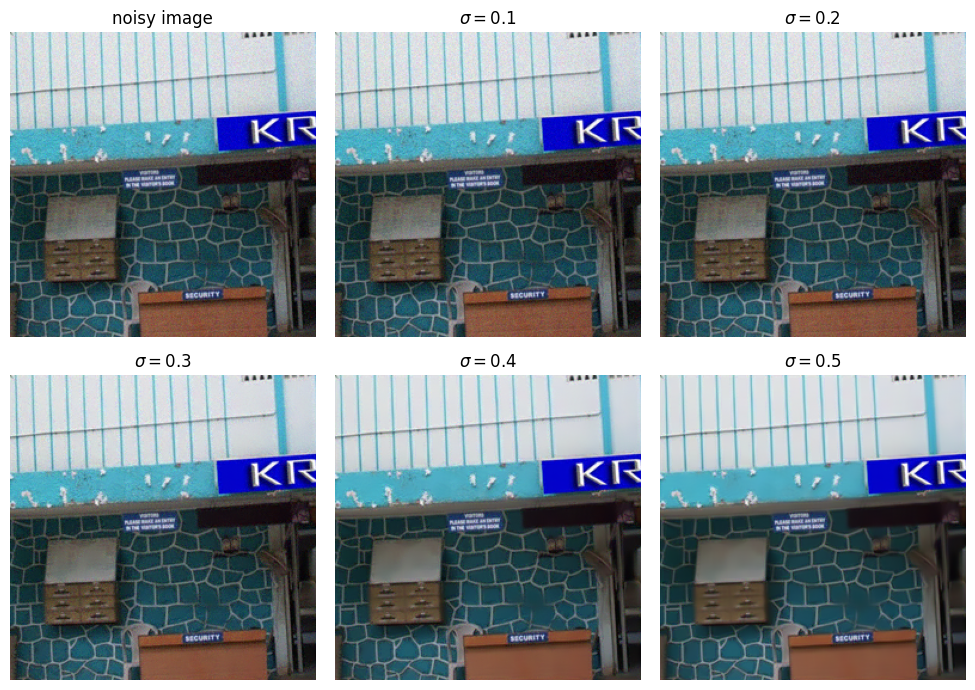

In [11]:
# plotting the filtered images
plt.figure(figsize=(10,7))

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(f_hat_b[i])
  if i == 0:
    plt.title('noisy image')
  else:
    plt.title(f'$\sigma = {sigmaNLM[i-1]}$')
  plt.axis('off')
  plt.tight_layout()

# **Q2**
## Gaussian Filtering

## Gaussian filter
* The kerenl is given by.
\begin{align*}
h(n,m) = \frac{1}{2\pi\sigma^2} e ^{-\frac{(n^2 + m^2 )}{2 \sigma^2}}
\end{align*}
* We normalize the values of the kernel so that the kernel values add up to 1.

`gaussian_filter` computes the kernel

In [12]:
# gaussian filter
def gaussian_filter(sigma,kernel_size):

  # if sigma is zero, kernel size is 1 with value 1
  if sigma == 0:
    return np.ones((1,1))

  # kernel size is odd number equal to or next nearest to (6*sigma +1)
  size            = kernel_size
  # initializing a blank kernel
  kernel          = np.zeros((size,size))

  # updating the kernel with gaussian values where (0,0) being at the centre
  for n in range(size):
    for m in range(size):
      i           = n - size//2
      j           = m - size//2
      kernel[n,m] = np.exp(-(i**2 + j**2)/(2*sigma**2))

  # normalizing the kernel so that sum = 1
  sum             = np.sum(kernel,axis=None)
  kernel          = (kernel / sum )

  return kernel

`pad` function performs zero padding to the input image so as to do convolution

In [13]:
# return a zero padded image required for convolution
def pad(image,kernel):

  kernel_size = kernel.shape[0]
  # no of zero padding on one side will be 'n' if kernel size is '2n+1'
  pad_size    = kernel_size//2
  # dimensions of original image
  ht, wd      = image.shape

  # if the kernel size is 1, the no need for padding
  if kernel_size == 1:
    return image

  # zero padding
  padded_image = np.zeros((ht+ 2*pad_size,wd+ 2*pad_size))
  padded_image[pad_size:-pad_size,pad_size:-pad_size] = image

  return padded_image

`blur` performs the convolution given input image and kernel

In [14]:
# 2D convolution with kernel
def blur(image,kernel):

  # abstracting image size and kernel size
  img_ht , img_wd = image.shape
  kernel_size     = kernel.shape[0]

  # if kernel size is 1, then output will be the image multiplied by the kernel value
  if kernel_size == 1:
    return image * kernel[0,0]

  # zero padding
  padded_image    = pad(image,kernel)
  # creating a blank image for output
  blured_image    = np.zeros_like(image)

  for n in range(img_ht):
    for m in range(img_wd):
      # 2D convolution with kernal
      conv2d_val        = np.sum(padded_image[n:n+kernel_size,m:m+kernel_size] * kernel, axis=None)
      blured_image[n,m] = conv2d_val

  return blured_image


`RGB_gaussian_filter` performs gaussian filtering for a color image

In [15]:
def RGB_gaussian_filter(img,sigma,kernel_size):

  # this function performs guassian filtering for each channels
  filtered_image        = np.zeros_like(img)
  kernel                = gaussian_filter(sigma,kernel_size)

  filtered_image[:,:,0] = blur(img[:,:,0],kernel)
  filtered_image[:,:,1] = blur(img[:,:,1],kernel)
  filtered_image[:,:,2] = blur(img[:,:,2],kernel)

  return filtered_image

#### Performing Gaussian filtering for kernel size = 7 and $\sigma = \{0.1,0.2,0.3,0.4,0.5\}$

In [16]:
kernel_size     = 7
sigmas          = [0.1,0.2,0.3,0.4,0.5]

#list to store filtered images
f_hat_gaussian  = [noisy_g]

#performing NLM filter
for sigma in sigmas:
  f_hat_gaussian.append(RGB_gaussian_filter(noisy_g,sigma,kernel_size))

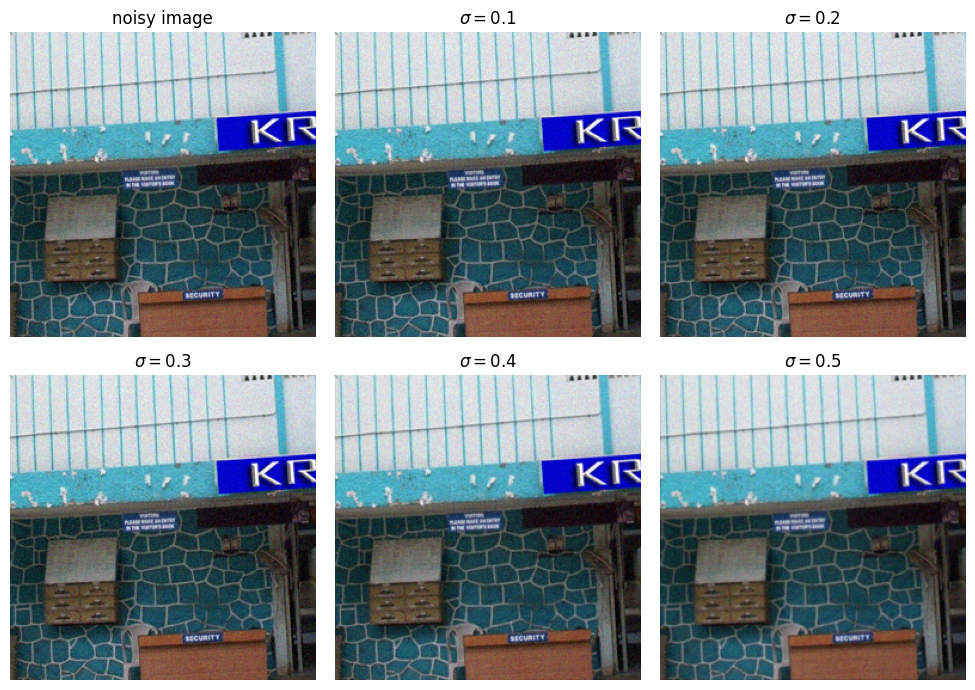

In [17]:
# plotting the filtered images
plt.figure(figsize=(10,7))

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(f_hat_gaussian[i])
  if i == 0:
    plt.title('noisy image')
  else:
    plt.title(f'$\sigma = {sigmas[i-1]}$')
  plt.axis('off')
  plt.tight_layout()

# PSNR
PSNR between a latent image $f$ and filtered image $f^{\hat{}}$ is given by

$$
PSNR = 10log_{10}\left(\frac{MAX*MAX}{{MSE}}\right)
$$

where $$
MAX = 1  
$$
and
$$
MSE=(f − f^{\hat{}} )^T (f − f^{\hat{}})/(total\_
number\_of\_pixels\_including\_all\_colour\_channels)
$$

In [18]:
def PSNR(img1,img2):

  img1  = img1.reshape(-1)
  img2  = img2.reshape(-1)
  x     = (img1 - img2)

  # mean squared error
  MSE   = np.dot(x.T,x) / img1.shape[0]
  # peak-signal to noise ratio
  psnr  = 10*np.log10(1/MSE)

  return psnr

In [19]:
# filtered images from Q1(a), Q1(b) and Q2
f_hat         = [f_hat_a,f_hat_b,f_hat_gaussian]

# array to store PSNR values for each filtering
PSNR_a        = np.zeros(5)
PSNR_b        = np.zeros(5)
PSNR_gaussian = np.zeros(5)
PSNR_baseline =  np.zeros(5)

# calculating the PSNR values
for i in range(5):
  PSNR_a[i]         = PSNR(f, f_hat_a[i+1])
  PSNR_b[i]         = PSNR(f, f_hat_b[i+1])
  PSNR_gaussian[i]  = PSNR(f, f_hat_gaussian[i+1])
  PSNR_baseline[i]  = PSNR(f, noisy_g)

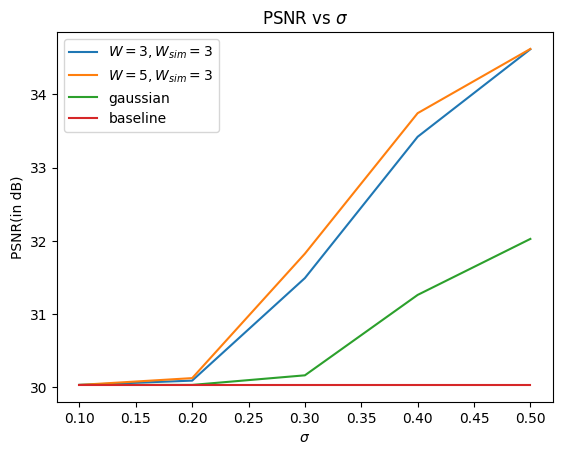

In [20]:
# plot of PSNR values with the sigma
plt.plot(sigmas,PSNR_a,label='$W=3, W_{sim}=3$')
plt.plot(sigmas,PSNR_b,label='$W=5, W_{sim}=3$')
plt.plot(sigmas,PSNR_gaussian,label='gaussian')
plt.plot(sigmas,PSNR_baseline,label='baseline')
plt.title("PSNR vs $\sigma$")
plt.xlabel("$\sigma$")
plt.ylabel("PSNR(in dB)")
plt.legend()
plt.show()

PSNR obtained by using the NLM filtering algorithm is better than that of the Gaussian filtering algorithm. Similarly higher neighbourhood radius $W(=5)$ has higher PSNR than lower $W(=3)$

# **Q3,Q4**

In [21]:
W                 = 5
Wsim              = 3
sigmaNLM          = 0.5 # for NLM filtering
sigma_g           = 1.0 # for gaussian filtering
kernel_size       = 11  # kernel size

row               = [31,38] # row index of both patches
col               = [46,58] # column index of both patches

gaussian          = RGB_gaussian_filter(noisy_g,sigma_g,kernel_size)
kernel            = gaussian_filter(sigma_g,kernel_size)

# noisy patch
patch1            = noisy_g[row[0]-W:row[0]+W+1,col[0]-W:col[0]+W+1,:]
patch2            = noisy_g[row[1]-W:row[1]+W+1,col[1]-W:col[1]+W+1,:]

# NLM filtered patch
NLM_filter1       = f_hat_b[5][row[0]-W:row[0]+W+1,col[0]-W:col[0]+W+1,:]
NLM_filter2       = f_hat_b[5][row[1]-W:row[1]+W+1,col[1]-W:col[1]+W+1,:]

# gaussian filtered patch
gaussian_filter2  = gaussian[row[1]-W:row[1]+W+1,col[1]-W:col[1]+W+1,:]
gaussian_filter1  = gaussian[row[0]-W:row[0]+W+1,col[0]-W:col[0]+W+1,:]

# storing the results in a list
patches           = [patch1,patch2]
NLM_filters       = [NLM_filter1, NLM_filter2]
gaussian_filters  = [gaussian_filter1,gaussian_filter2]



## Q3 Show the 11 × 11 filter (kernel) as an image.

[]

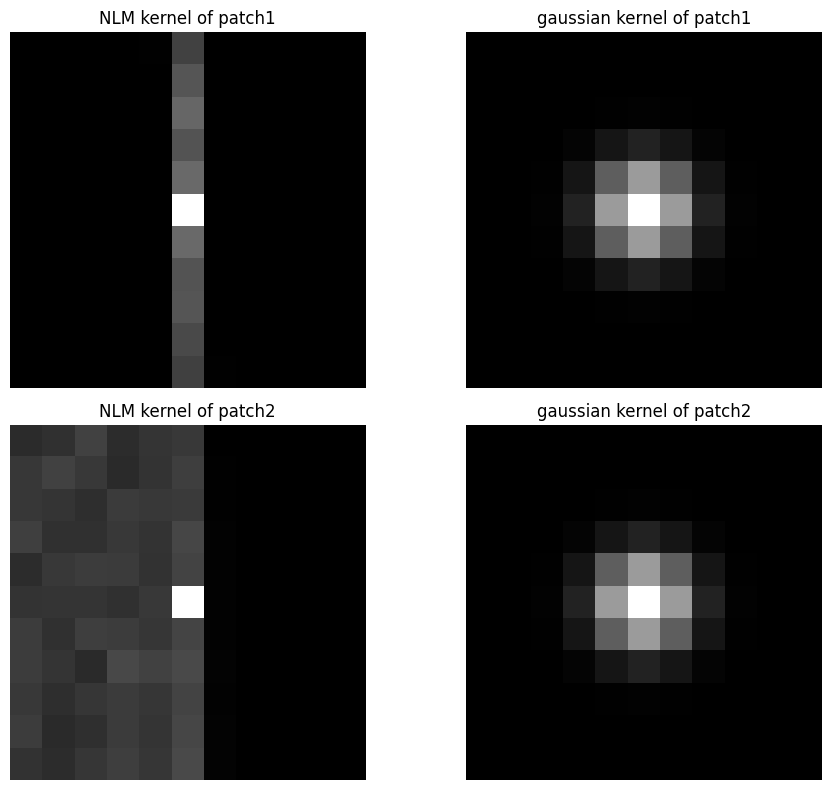

In [22]:
plt.figure(figsize=(10,8))
for i in range(2):

  Np_w  = noisy_g[row[i]-(W+Wsim):row[i]+(W+Wsim)+1,col[i]-(W+Wsim):col[i]+(W+Wsim)+1]
  wp    = get_wp(Np_w,Wsim,sigmaNLM)
  wp    = wp.reshape((2*W+1,2*W+1))
  plt.subplot(2,2,2*i+1)
  plt.imshow(wp,cmap='gray')
  plt.title(f'NLM kernel of patch{i+1}')
  plt.axis('off')

  plt.subplot(2,2,2*i+2)
  plt.imshow(kernel,cmap='gray')
  plt.title(f'gaussian kernel of patch{i+1}')
  plt.axis('off')

plt.tight_layout()
plt.plot()

The Gaussian kernel is the same for both (space invarient). The NLM kernels look very different
indicating the degree of similarity at each location.

## Q4 Show the 11 × 11 image patch from the noisy image and the denoised images.

[]

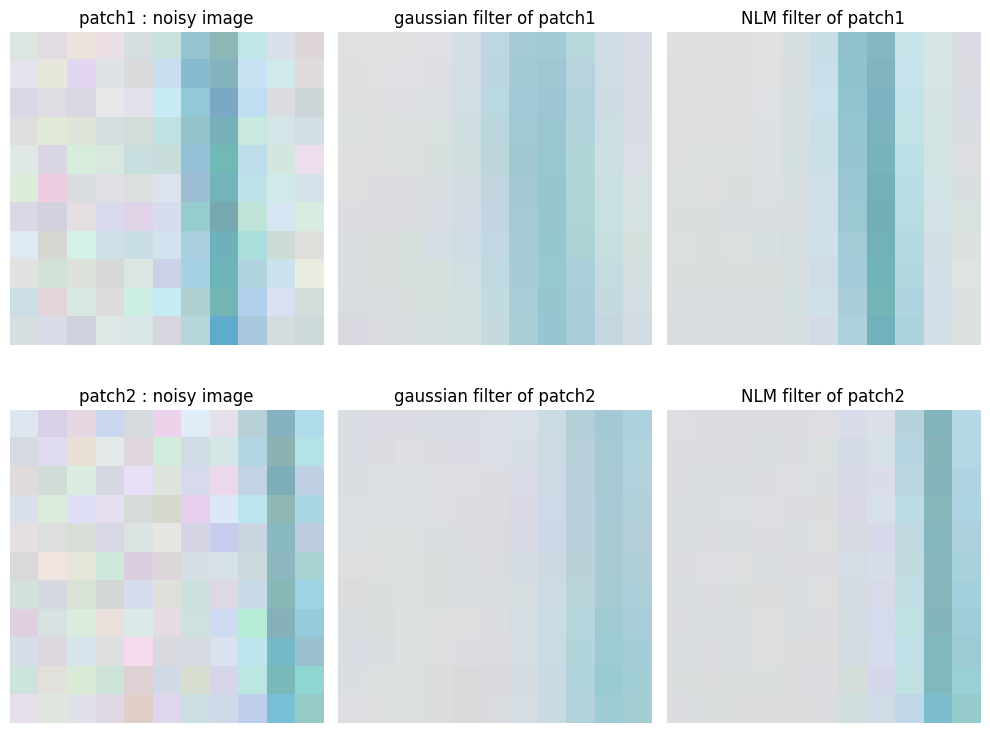

In [23]:
plt.figure(figsize=(10,8))
for i in range(2):
  plt.subplot(2,3,3*i+1)
  plt.imshow(patches[i])
  plt.title(f'patch{i+1} : noisy image')
  plt.axis('off')

  plt.subplot(2,3,3*i+2)
  plt.imshow(gaussian_filters[i])
  plt.title(f'gaussian filter of patch{i+1}')
  plt.axis('off')

  plt.subplot(2,3,3*i+3)
  plt.imshow(NLM_filters[i])
  plt.title(f'NLM filter of patch{i+1}')
  plt.axis('off')

plt.tight_layout()
plt.plot()

The NLM filtered output looks more sharper than the Gaussian filtered outputs.

# Inferences

* From the PSNR plot and the filter output of the patches, we can see that the NLM filter performs better than gaussian filtering.
* Gaussian flter blures the edges while NLM preserves it.(Evident from the filter output of the patches)
* As $\sigma$ increases the PSNR increaes. But increasing $\sigma$ beyond a certain point will reduce the PSNR due to more bluring.
* Higher neighbourhood radius W(=5) has higher PSNR than lower W(=3).
* Gaussian kernel is same for each pixel (Space invarien)
* NLM kernels on the other hand give a lot of weight only to pixels whose neighborhood is similar to the neighborhood of the pixel under consideration.
* NLM filtering is computationally moreexpensive than than gaussian filtering